## Checking regiochemistry

In [38]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, rdChemReactions
from rxnmapper import RXNMapper
from rxnutils.chem.reaction import ChemicalReaction
from transformers import logging

logging.set_verbosity_error()  # Only log errors
rxnmapper = RXNMapper()

from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True, nb_workers=22)

INFO: Pandarallel will run on 22 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


Get test set with mapped reactions

In [2]:
df = pd.read_csv("../../../data/predictions/transformer.csv")

df.head()

,canonical_rxn,target,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,mapping,rxn_template
0,C#Cc1ccccn1.C#Cc1ccccn1.C1CCNCC1.C1CCOC1>>C(C#...,C(C#Cc1ccccn1)#Cc1ccccn1,C(C#Cc1ccccn1)#Cc1ccccn1,C(#Cc1ccccn1)C#Cc1ccccn1,C(C#Cc1ccccn1)#Cc1ccccc1,c1ccc(C#CC#Cc2ccccn2)nc1,C(CC#Cc1ccccn1)#Cc1ccccn1,C(C#CC1CCCCN1)#Cc1ccccn1,C(#Cc1ccccn1)c1ccccn1,C(C#cc1ccccn1)#Cc1ccccn1,C(C#Cc1ccccn7)#Cc1ccccn1,C(C#Cc1ccccn1)c1ccccn1,"{'confidence': 0.5213508691358545, 'mapped_rxn...",[CH;D1;+0:1].[CH;D1;+0:2]>>[C;H0;D2;+0:1]-[C;H...
1,C1=CC2C=CC1C2.C=C(NC(C)=O)c1ccc(OC)cc1.CO.[H][...,COc1ccc([C@@H](C)NC(C)=O)cc1,COc1ccc([C@@H](C)NC(C)=O)cc1,COc1ccc([C@H](C)NC(C)=O)cc1,CC(=O)N[C@H](C)c1ccc(OC)cc1,COc1ccc(C(C)NC(C)=O)cc1,CC(=O)N[C@@H](C)c1ccc(OC)cc1,COc1ccc([C@@H](C)NC(=C)=O)cc1,BC[C@@H](NC(C)=O)c1ccc(OC)cc1,OCc1ccc([C@@H](C)NC(C)=O)cc1,CC(=O)N[C@H](C)c1ccc(O)cc1,COc1ccc([C@@H](C)C(C)=O)cc1,"{'confidence': 0.9036738573905622, 'mapped_rxn...",[C;H0;D3;+0:1]=[CH2;D1;+0:2]>>[C@@H;D3;+0:1]-[...
2,C=C(NC(C)=O)c1ccc(OC)cc1.ClCCl.[H][H].[Rh+]>>C...,COc1ccc([C@@H](C)NC(C)=O)cc1,COc1ccc([C@@H](C)NC(C)=O)cc1,COc1ccc([C@H](C)NC(C)=O)cc1,COc1ccc(C(C)NC(C)=O)cc1,CC(=O)N[C@H](C)c1ccc(OC)cc1,COc1ccc([C@@H](C)NC(=C)=O)cc1,COc1ccc([C@@H](C)CNC(C)=O)cc1,COc1ccc([C@@H](C)NC(=O)C)cc1,CC(=O)N[C@@H](C)c1ccc(OC)cc1,COC(=O)N[C@H](C)c1ccc(OC)cc1,CC(=O)N[C@H](C)c1ccc(O)cc1,"{'confidence': 0.9130669694736414, 'mapped_rxn...",[C;H0;D3;+0:1]=[CH2;D1;+0:2]>>[C@@H;D3;+0:1]-[...
3,C=C(NC(C)=O)c1ccc(OC)cc1.Cc1ccccc1.[H][H]>>COc...,COc1ccc([C@@H](C)NC(C)=O)cc1,COc1ccc([C@@H](C)NC(C)=O)cc1,COc1ccc(C(C)NC(C)=O)cc1,COc1ccc([C@H](C)NC(C)=O)cc1,CC(=O)N[C@H](C)c1ccc(OC)cc1,CC(=O)N[C@@H](C)c1ccc(OC)cc1,COc1ccc([C@@H](C)CNC(C)=O)cc1,COc1ccc([C@@H](C)NC(=C)=O)cc1,C=C(NC(C)=O)c1ccc(OC)cc1,C=C(NC(C)=O)c1ccc(O)cc1,CC(=O)N[C@H](C)c1ccc(O)cc1,"{'confidence': 0.9239813519781596, 'mapped_rxn...",[C;H0;D3;+0:1]=[CH2;D1;+0:2]>>[C@@H;D3;+0:1]-[...
4,Cc1ccc(OCC(=O)O)cc1.O=S(Cl)Cl.c1ccccc1>>Cc1ccc...,Cc1ccc(OCC(=O)Cl)cc1,Cc1ccc(OCC(=O)Cl)cc1,Cc1ccc(OCC(N)=O)cc1,Cc1ccc2c(c1)C(=O)CO2,O=C(O)COc1ccc(CCl)cc1,COC(=O)COc1ccc(C)cc1,CCOC(=O)COc1ccc(C)cc1,Cc1ccc(OCC(=N)N)cc1.Cl,Cc1ccc(OCC(=N)N)cc1,O=C(Cl)COc1ccc(CCl)cc1,O=C(O)COc1ccc(CBr)cc1,"{'confidence': 0.4806019658752691, 'mapped_rxn...",Cl-S(=O)-[Cl;H0;D1;+0:1].O-[C;H0;D3;+0:2]>>[C;...


In [29]:
df.drop(["rxn_template"], axis=1, inplace=True)

In [6]:
def template_smarts_from_mapped_smiles(mapped_smiles, radius=0, failed_template=False):
    """Get reaction template from mapped reaction SMILES.
    Args:
        mapped_smiles: str, mapped reaction SMILES
        radius: int, radius of the reaction template
        failed_template: bool, if True, return the mapped_smiles that failed to generate a template
    Out:
        template: str, reaction template
    """
    rxn = ChemicalReaction(mapped_smiles, clean_smiles=False)
    failed_templates = []
    try:
        rxn.generate_reaction_template(radius)
        return rxn.canonical_template.smarts
    except:
        if failed_template != False:
            failed_templates.append(mapped_smiles)

    if failed_template != False:
        print("Problem generating the templates of the following reactions: \n", failed_templates)

    return ""

This function checks for regiochemistry issues taking rxn, map and extracted template as inputs

In [19]:
def check_regio(rxn, map_rxn, template):
    def _sanitize_filter_prods(prods):
        good = []
        for prod in prods:
            try:
                x = Chem.SanitizeMol(prod[0])
                good.append(Chem.MolToSmiles(prod[0]))
            except:
                pass
        return set(good)

    rxn_list = rxn.split(">>")[0].split(".")
    map_list = map_rxn.split(">>")[0].split(".")

    # compare lists and extract only the elements from rxn_list that are different from rxn_smiles_list
    reactants = [i for i in rxn_list if i not in map_list]

    # check if reactants generate several products
    reaction = AllChem.ReactionFromSmarts(template)
    reaction.Initialize()

    try:
        if len(reactants) == 2:
            r1 = Chem.MolFromSmiles(reactants[0])
            r2 = Chem.MolFromSmiles(reactants[1])

            mols = [(r1, r2), (r2, r1)]

            for reactants in mols:
                new_products = reaction.RunReactants(reactants)
                if new_products == ():
                    pass
                else:
                    products = _sanitize_filter_prods(new_products)

        if len(reactants) == 1:
            r1 = Chem.MolFromSmiles(reactants[0])
            new_products = reaction.RunReactants((r1,))
            products = _sanitize_filter_prods(new_products)

        if len(products) == 1:
            return False, products
        elif len(products) > 1:
            return True, products
        else:
            return False, None

    except:
        return False, None

This function is used to look for regioselective reactions for the same dataframe but using templates of r=0, r=1, r=2 (we study the balance between generality and accuracy)

In [50]:
def df_to_template_regio(df, radius, n=15):
    def _check_template(template):
        try:
            rxn = AllChem.ReactionFromSmarts(template)
            return True
        except:
            return False

    # sample from df
    samp = df.sample(1000, random_state=33)
    # create template column
    samp["template"] = samp["mapping"].parallel_apply(
        lambda x: template_smarts_from_mapped_smiles(
            x.split("xn': '")[1].split("'}")[0], radius=radius
        )
    )

    # filter non valid templates
    samp.dropna(inplace=True)
    samp["temp_ok"] = samp["template"].parallel_apply(lambda x: _check_template(x))
    samp = samp[samp["temp_ok"] == True]
    # create regioselective column

    flags = []
    prods = []

    for i, row in samp.iterrows():
        rxn = row["canonical_rxn"]
        mapped = row["mapping"].split("xn': '")[1].split("'}")[0]
        temp = row["template"]
        value = check_regio(rxn, mapped, temp)
        flags.append(value[0])

        if value[0] == True:
            prods.append(value[1])
        else:
            prods.append("")

    samp["regio_flag"] = flags
    samp["regio_prods"] = prods

    # sample n rxns that are regioselective and show them
    regio = samp[samp["regio_flag"] == True]

    rxns = regio.sample(n, random_state=33)

    for i, rxn in rxns.iterrows():
        smiles = rxn["canonical_rxn"]
        smarts = AllChem.ReactionFromSmarts(smiles, useSmiles=True)
        temp = rxn["template"]
        # print row index
        print(i)
        print(temp)
        display(smarts)
        prods = rxn["regio_prods"]
        mols = [Chem.MolFromSmiles(i) for i in prods]
        display(Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200, 200)))

### Check radius=0

24568
[C;H0;D3;+0:1]=[O;H0;D1;+0:2]>>[CH;D3;+0:1]-[OH;D1;+0:2]


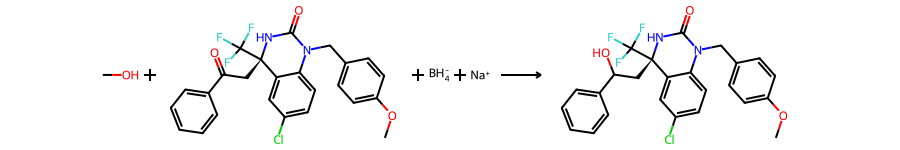

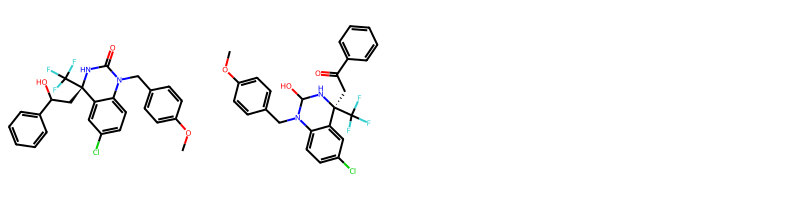

10772
[CH2;D2;+0:1].[CH;D2;+0:2]=[O;H0;D1;+0:3]>>[C@H;D3;+0:1]-[C@@H;D3;+0:2]-[OH;D1;+0:3]


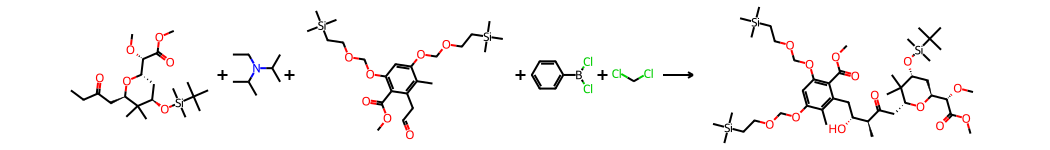

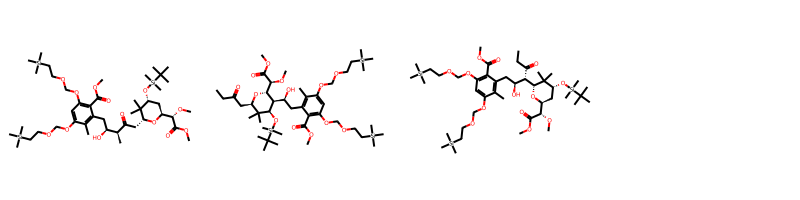

10037
C-[O;H0;D2;+0:1]>>[OH;D1;+0:1]


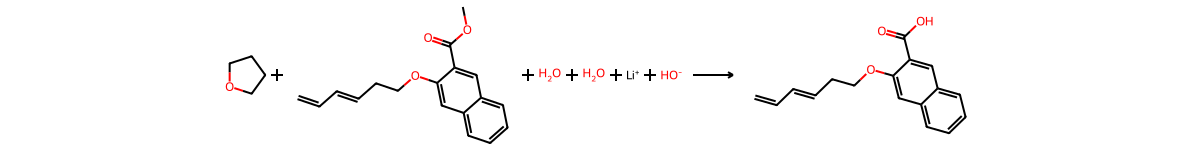

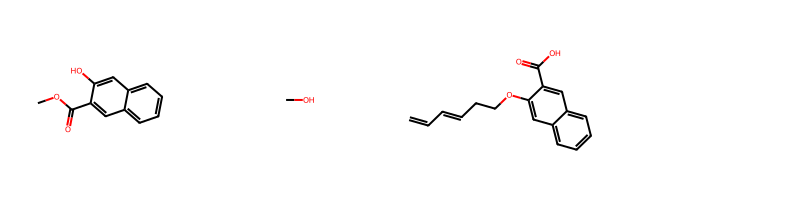

17719
[CH;D1;+0:1].[cH;D2;+0:2]>>[C;H0;D2;+0:1]-[c;H0;D3;+0:2]


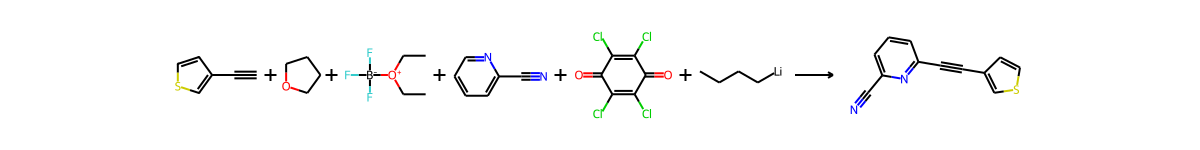

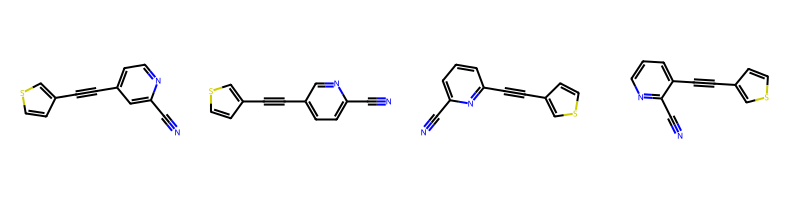

12496
C-[O;H0;D2;+0:1]>>[OH;D1;+0:1]


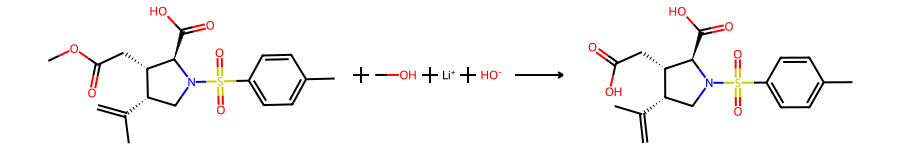

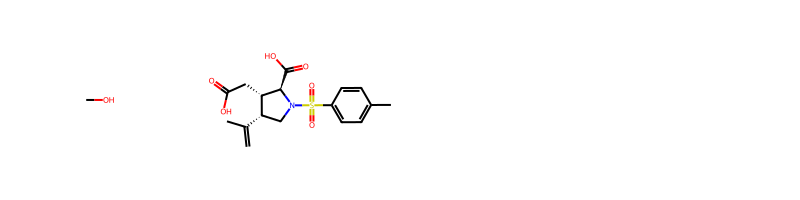

10644
C-[O;H0;D2;+0:1]>>[OH;D1;+0:1]


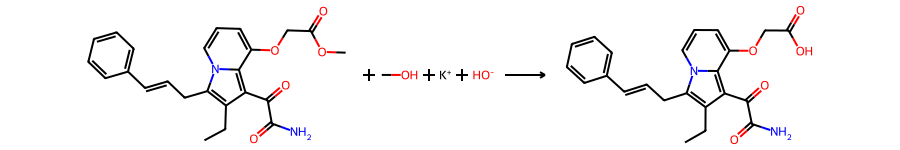

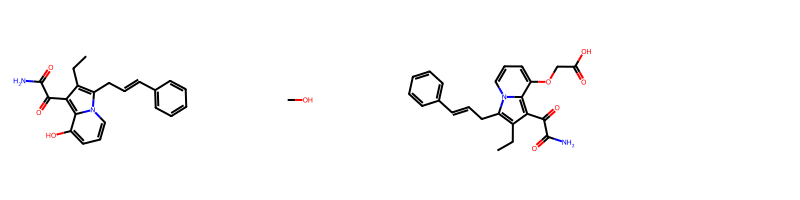

30458
C-[O;H0;D2;+0:1]>>[OH;D1;+0:1]


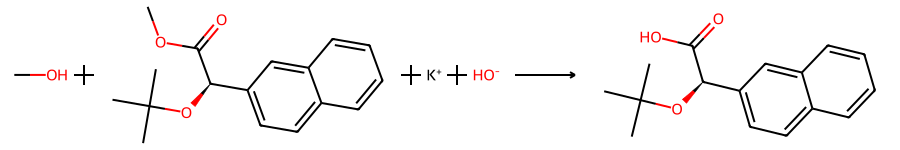

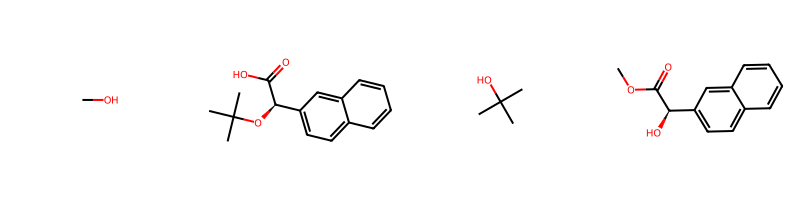

23947
[CH2;D2;+0:1]-[C;H0;D4;+0:2](-[C;H0;D3;+0:3]=[CH;D2;+0:4])-N1-C-C-C-C-1>>[cH;D2;+0:1]:[c;H0;D3;+0:2]:[c;H0;D3;+0:3]:[cH;D2;+0:4]


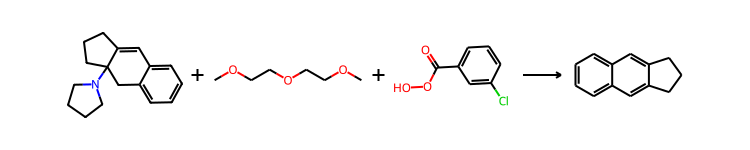

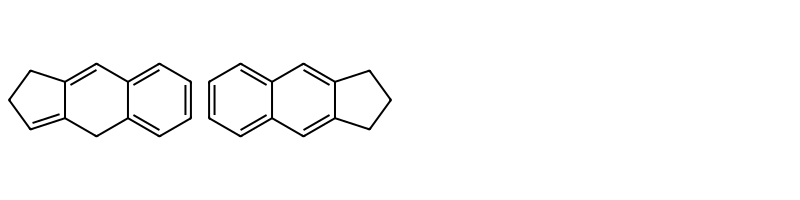

42716
C-[O;H0;D2;+0:1]>>[OH;D1;+0:1]


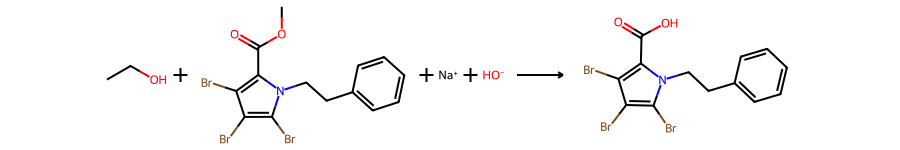

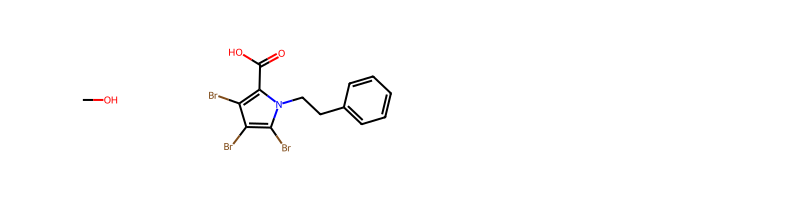

36271
O=[CH;D2;+0:1].[CH3;D1;+0:2]>>[CH;D2;+0:1]=[CH;D2;+0:2]


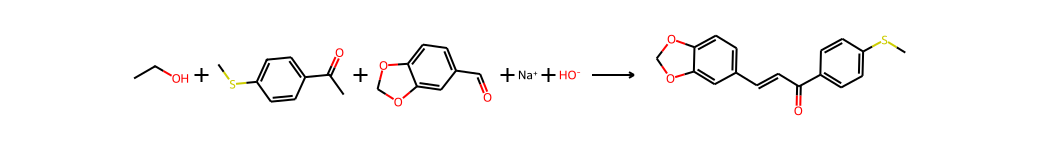

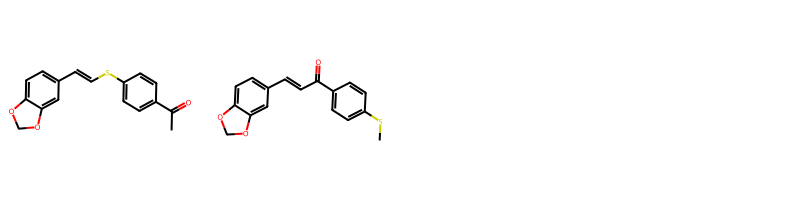

20241
C-O-[C;H0;D3;+0:1].[NH2;D1;+0:2]>>[C;H0;D3;+0:1]-[NH;D2;+0:2]


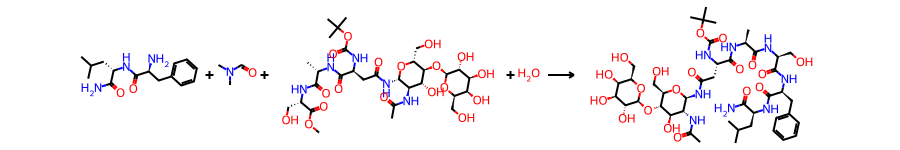

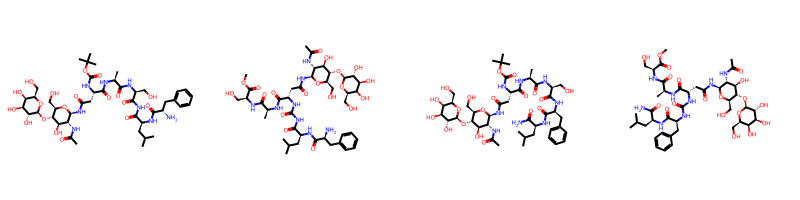

7590
O-[C;H0;D3;+0:1].[NH2;D1;+0:2]>>[C;H0;D3;+0:1]-[NH;D2;+0:2]


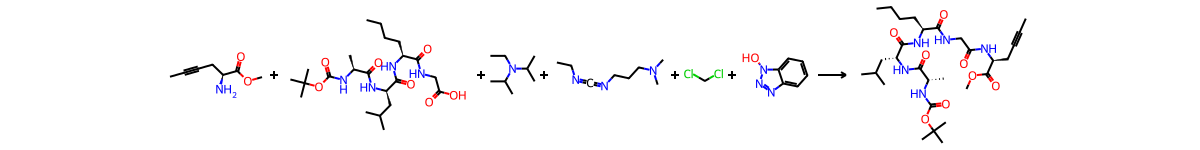

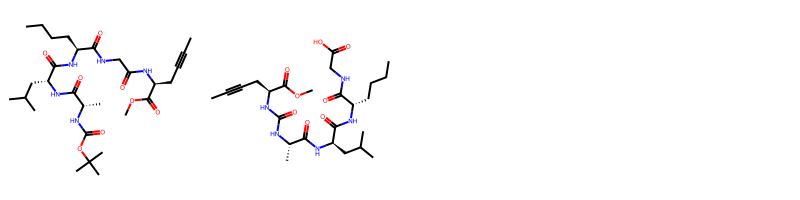

36440
Cl-[c;H0;D3;+0:1].[NH2;D1;+0:2]>>[NH;D2;+0:2]-[c;H0;D3;+0:1]


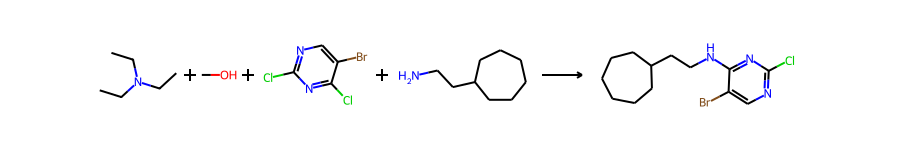

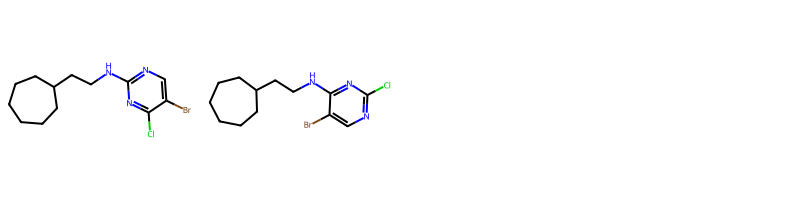

13612
C-C(-C)(-C)-C(=O)-[O;H0;D2;+0:1]>>[OH;D1;+0:1]


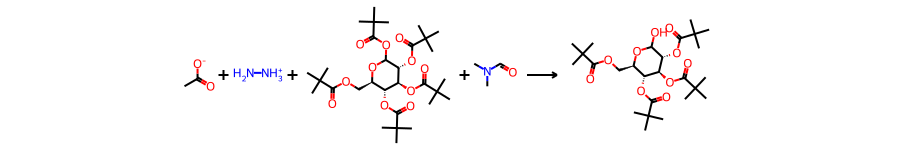

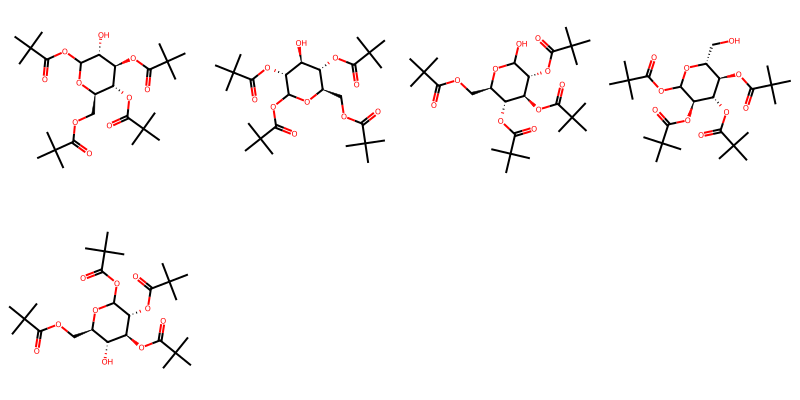

11878
C-[O;H0;D2;+0:1]>>[OH;D1;+0:1]


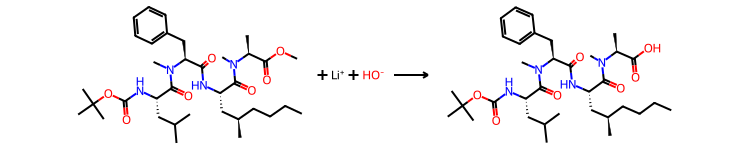

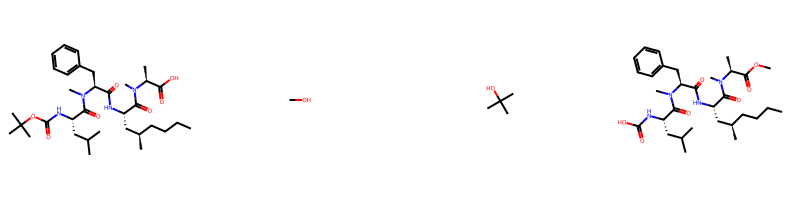

In [51]:
df_to_template_regio(df, radius=0, n=15)

4 out of 15 reactions are correctly flagged as regioselective.

### Check radius=1

35184
[C:1]-[C;H0;D3;+0:2](-[C:3])=[O;H0;D1;+0:4]>>[C:1]-[C@H;D3;+0:2](-[C:3])-[OH;D1;+0:4]


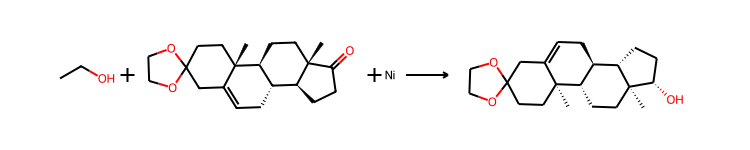

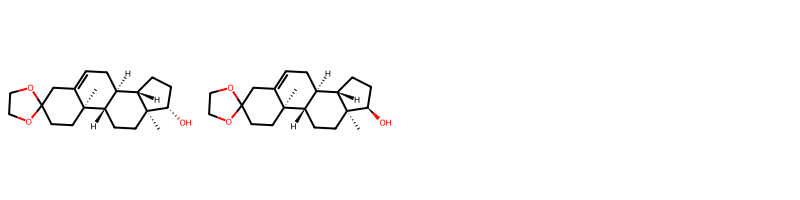

43535
C-[O;H0;D2;+0:1]-[C:2](-[C:3])=[O;D1;H0:4]>>[C:3]-[C:2](=[O;D1;H0:4])-[OH;D1;+0:1]


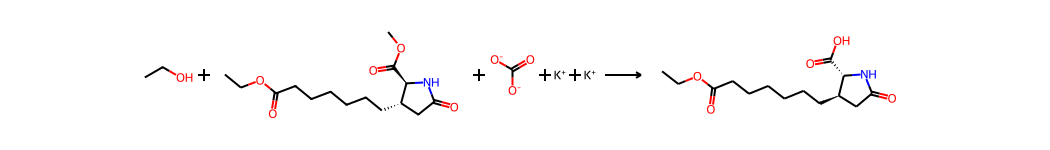

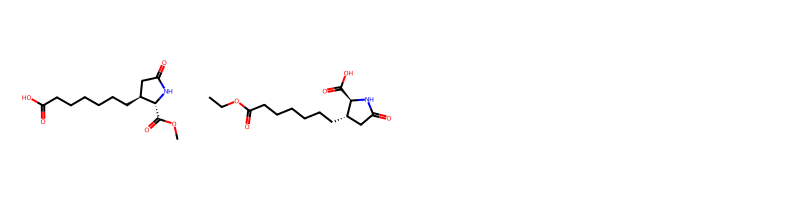

8694
C-[O;H0;D2;+0:1]-[c:2]>>[OH;D1;+0:1]-[c:2]


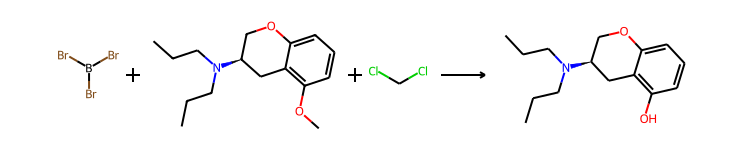

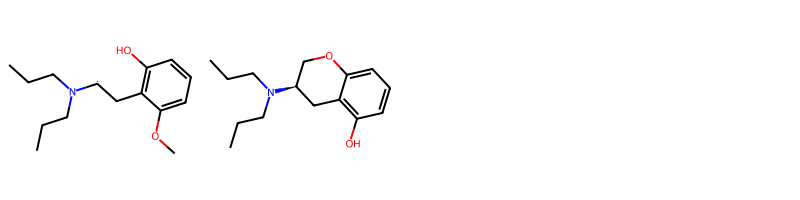

47849
[C:1]1=[C:2]\[C:3]=[C:4]/[CH;D2;+0:5]=[CH;D2;+0:6]\[C@@H;D3;+0:7]2-[C:8]-[C@H;D3;+0:9]/1-2>>[C:1]1=[C:2]-[C:3]=[C:4]-[C@H;D3;+0:5]2-[CH;D2;+0:6]=[CH;D2;+0:7]-[C:8]-[C@H;D3;+0:9]-1-2


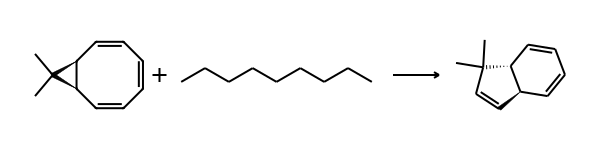

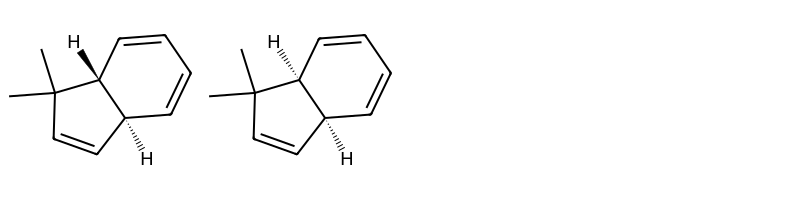

25407
O=[C;H0;D3;+0:1](-[C:2])-[C:3](-[C:4]=[O;D1;H0:5])-[C:6]=[O;D1;H0:7]>>[C:2]-[CH2;D2;+0:1]-[C:3](-[C:4]=[O;D1;H0:5])-[C:6]=[O;D1;H0:7]


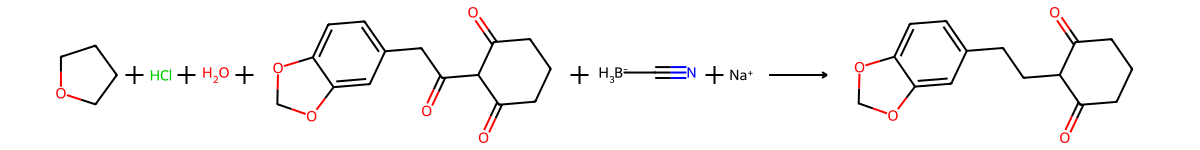

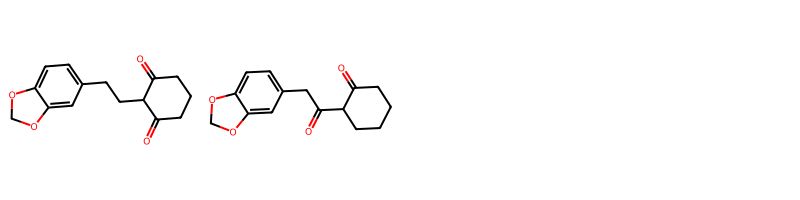

35662
C-[O;H0;D2;+0:1]-[c:2]>>[OH;D1;+0:1]-[c:2]


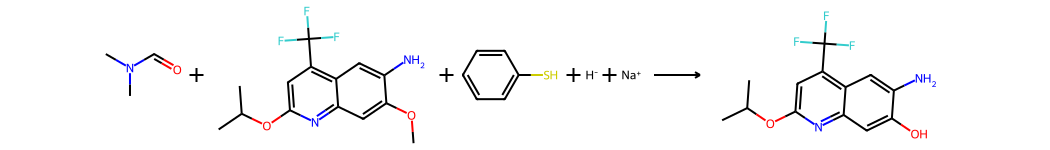

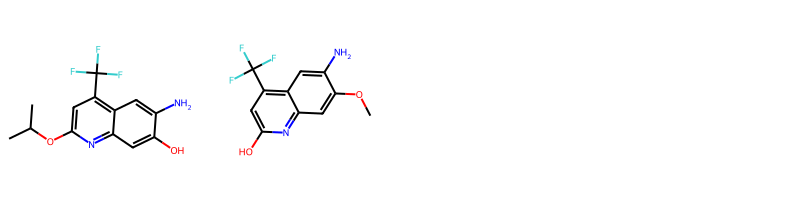

12519
C-C(-C)=[CH;D2;+0:1]-[C:2]>>[C:2]-[CH;D2;+0:1]=[O;D1;H0:3]


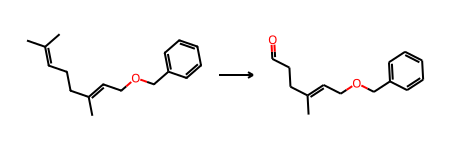

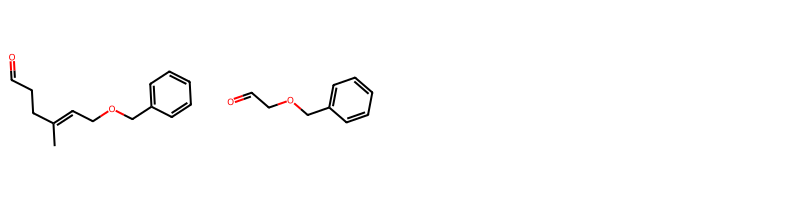

43413
O-[C;H0;D4;+0:1](-[C:2])(-[c:3])-[CH2;D2;+0:4]-[C:5]>>[C:2]-[C;H0;D3;+0:1](-[c:3])=[CH;D2;+0:4]-[C:5]


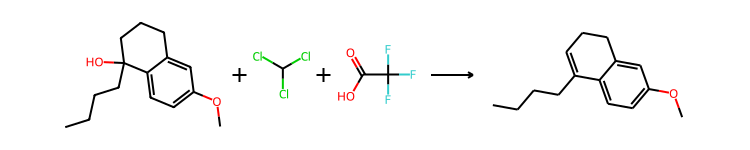

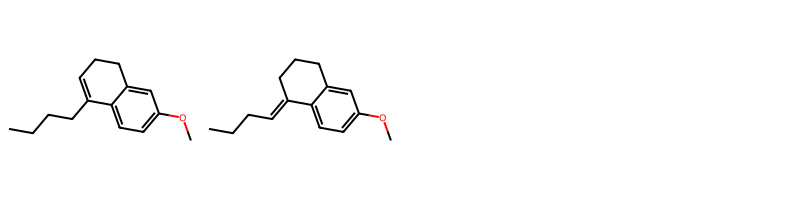

42659
[c:1]:[cH;D2;+0:2]:[c:3]>>[Cl;D1;H0:4]-[c;H0;D3;+0:2](:[c:1]):[c:3]


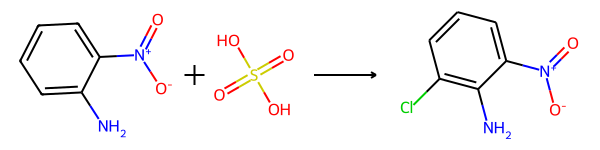

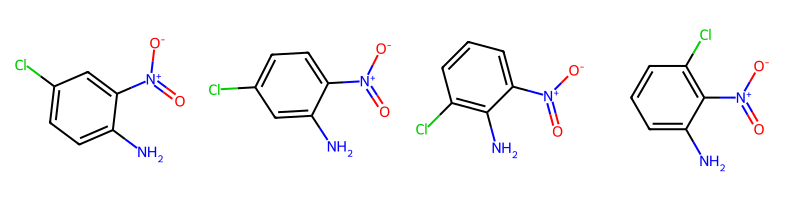

11123
F-C(-F)(-F)-S(=O)(=O)-O-[Si;H0;D4;+0:1](-[C:2])(-[C;D1;H3:3])-[C;D1;H3:4].[C:5]-[OH;D1;+0:6]>>[C:2]-[Si;H0;D4;+0:1](-[C;D1;H3:3])(-[C;D1;H3:4])-[O;H0;D2;+0:6]-[C:5]


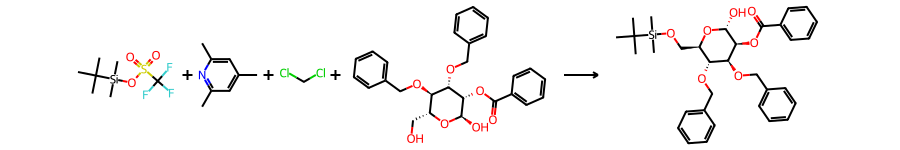

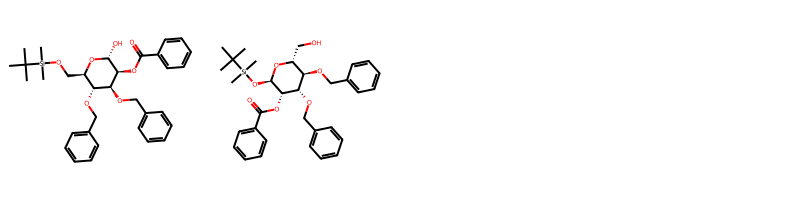

38891
O-C(=O)-[C;H0;D3;+0:1](=[O;D1;H0:2])-[c:3].[c:4]:[cH;D2;+0:5]:[c:6]>>[O;D1;H0:2]=[C;H0;D3;+0:1](-[c:3])-[c;H0;D3;+0:5](:[c:4]):[c:6]


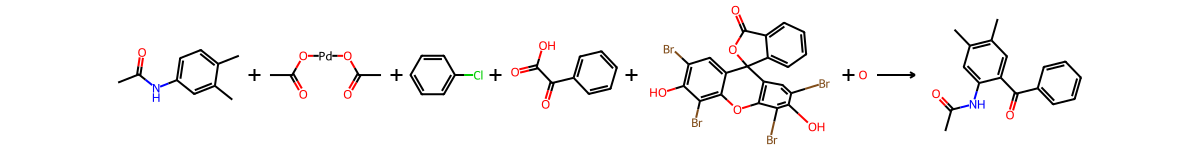

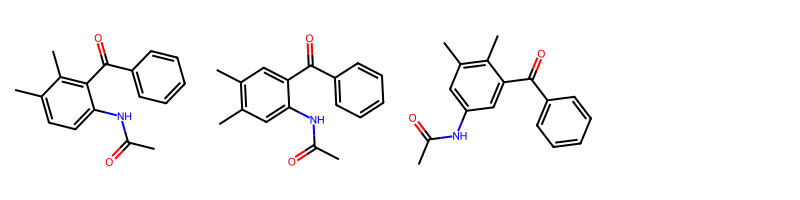

41670
[O;H0;D1;+0:1]=[CH;D2;+0:2]-[c:3].[c:4]:[cH;D2;+0:5]:[c:6]>>[OH;D1;+0:1]-[CH;D3;+0:2](-[c:3])-[c;H0;D3;+0:5](:[c:4]):[c:6]


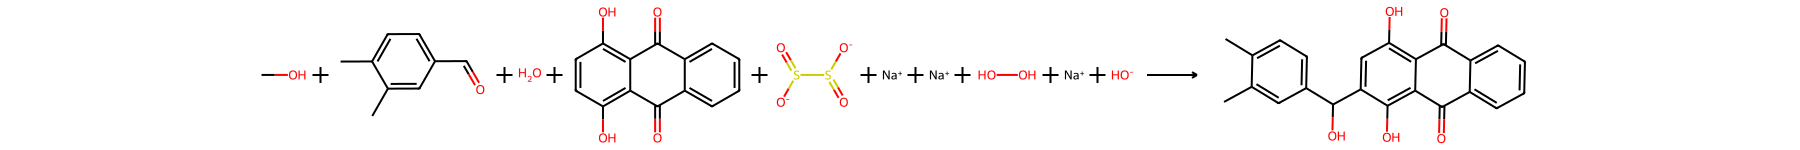

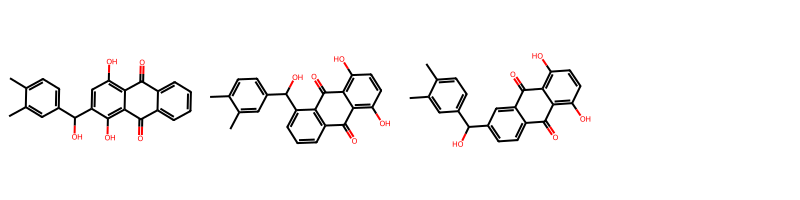

25684
C-O-C-[O;H0;D2;+0:1]-[C:2]>>[C:2]-[OH;D1;+0:1]


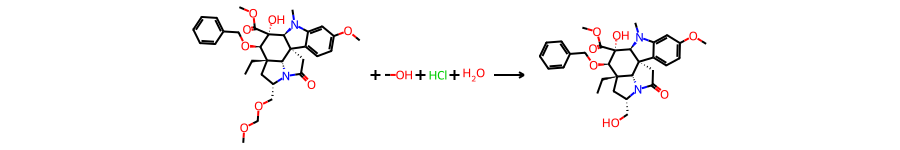

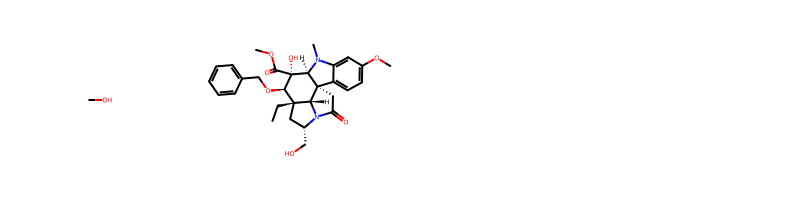

1357
C-C(=O)-[O;H0;D2;+0:1]-[C:2](-[C:3])-[C:4]=[C:5]>>[C:3]-[C:2](-[OH;D1;+0:1])-[C:4]=[C:5]


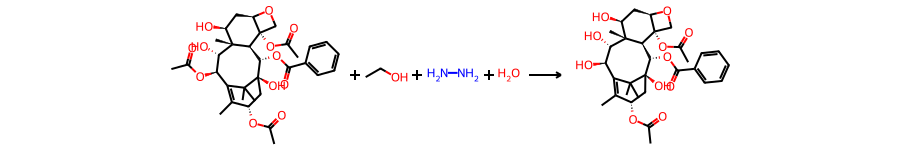

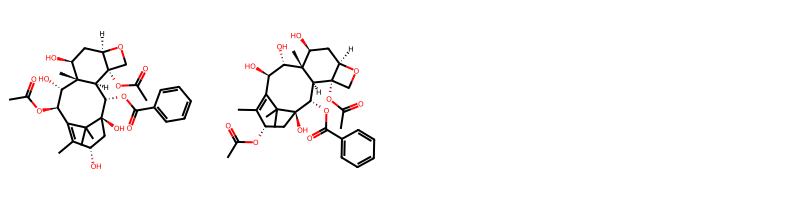

48922
[c:1]:[cH;D2;+0:2]:[c:3]>>[Cl;D1;H0:4]-[c;H0;D3;+0:2](:[c:1]):[c:3]


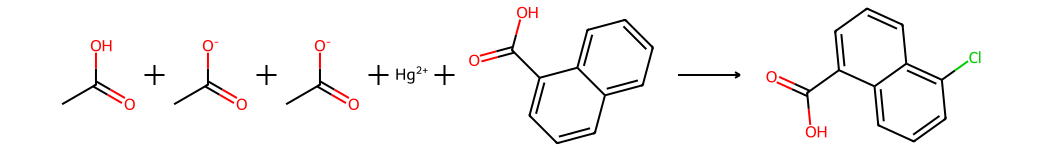

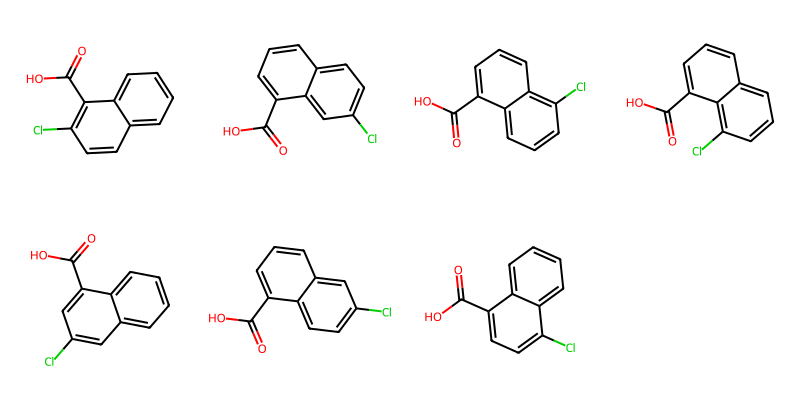

In [52]:
df_to_template_regio(df, radius=1, n=15)

14 out of 15 reactions are correctly flagged (2 of them are stereoselective as well, that could be a later filter)

### Check radius = 2 (only show 5 reactions as it is more restricted)

8694
C-[O;H0;D2;+0:1]-[c:2](:[c:3]):[c:4]>>[OH;D1;+0:1]-[c:2](:[c:3]):[c:4]


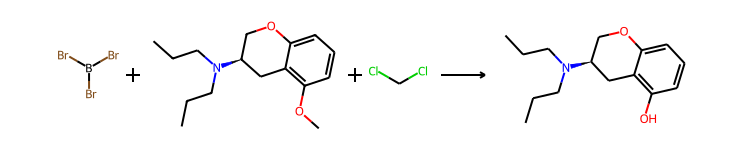

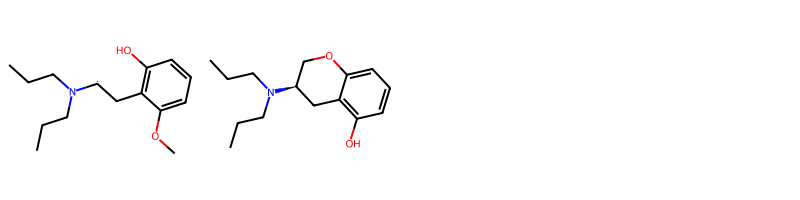

48922
[c:1]:[c:2]:[cH;D2;+0:3]:[c:4](:[c:5]):[c:6]>>[Cl;D1;H0:7]-[c;H0;D3;+0:3](:[c:2]:[c:1]):[c:4](:[c:5]):[c:6]


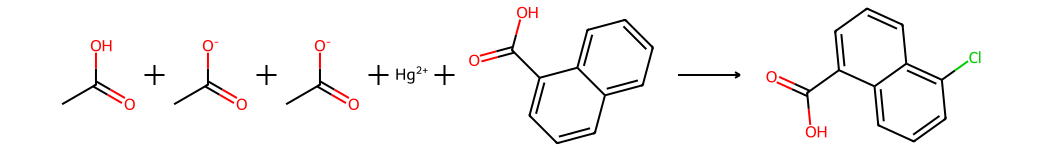

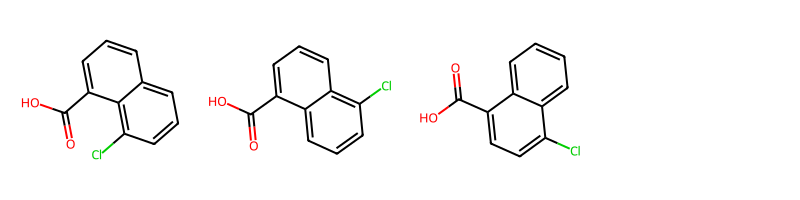

49767
C-N(-[CH;D2;+0:1]=[O;D1;H0:2])-c1:c:c:c:c:c:1.[c:3]:[c:4](:[c:5]):[cH;D2;+0:6]:[c:7]:[c:8]>>[O;D1;H0:2]=[CH;D2;+0:1]-[c;H0;D3;+0:6](:[c:7]:[c:8]):[c:4](:[c:3]):[c:5]


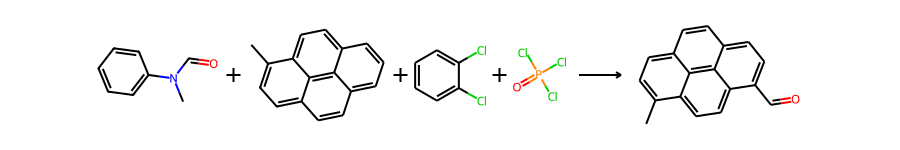

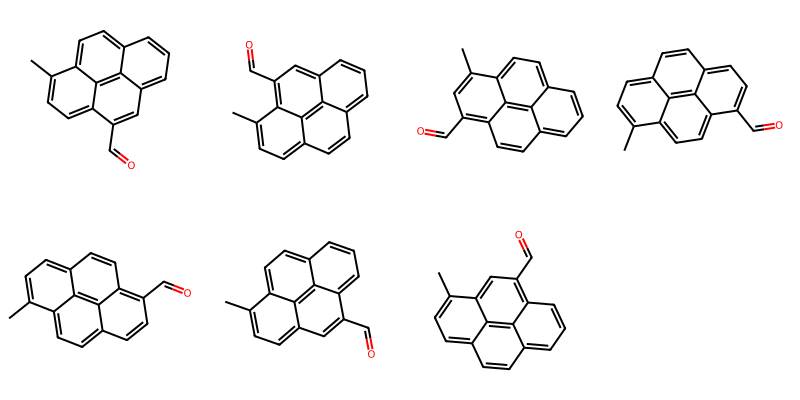

47849
[C;D1;H3:1]-[C:2]1(-[C;D1;H3:3])-[C@H;D3;+0:4]2/[C:5]=[C:6]\[C:7]=[C:8]/[CH;D2;+0:9]=[CH;D2;+0:10]\[C@H;D3;+0:11]-2-1>>[C;D1;H3:1]-[C:2]1(-[C;D1;H3:3])-[CH;D2;+0:11]=[CH;D2;+0:10]-[C@@H;D3;+0:9]2-[C:8]=[C:7]-[C:6]=[C:5]-[C@H;D3;+0:4]-2-1


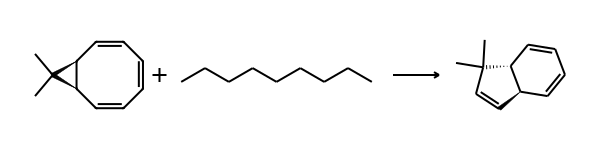

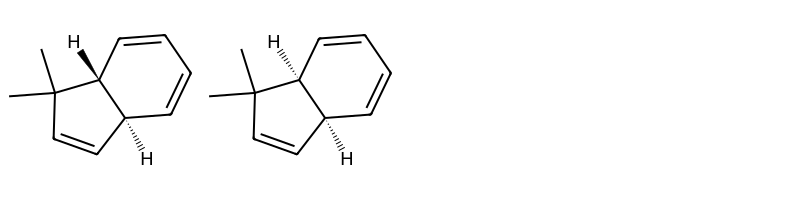

25458
Cl-[C;H0;D3;+0:1](=[O;D1;H0:2])-[C:3](-[c:4])-[C:5]-[C:6]-[c:7](:[c:8]):[cH;D2;+0:9]:[c:10]:[c:11]>>[O;D1;H0:2]=[C;H0;D3;+0:1]1-[C:3](-[c:4])-[C:5]-[C:6]-[c:7](:[c:8]):[c;H0;D3;+0:9]-1:[c:10]:[c:11]


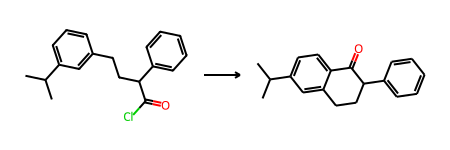

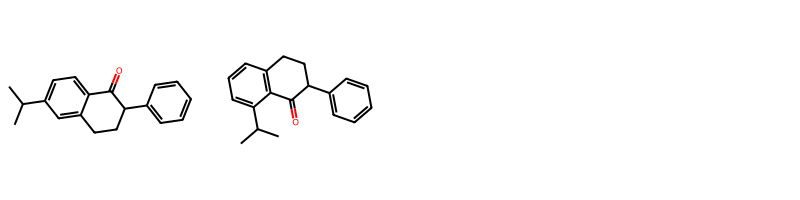

In [56]:
df_to_template_regio(df, radius=2, n=5)

The 5 reactions are correctly flagged as regioselective (but it might be too restrictive as we get less than 15 flagged reactions).